### Generator Points

In [29]:
import matplotlib.pyplot as plt
from py_ecc.bn128 import G1, multiply, add, eq, neg, curve_order, field_modulus, Z1
import math
import numpy as np

In [30]:
print(G1)
print(">>>> G1 + G1")
print(add(G1, G1)) # Adding the generator point to itself
print(">>>> G1 * 2")
print(multiply(G1, 2)) # Multiplying the generator point with 2 -> G1 * 2 == G1 + G1

(1, 2)
>>>> G1 + G1
(1368015179489954701390400359078579693043519447331113978918064868415326638035, 9918110051302171585080402603319702774565515993150576347155970296011118125764)
>>>> G1 * 2
(1368015179489954701390400359078579693043519447331113978918064868415326638035, 9918110051302171585080402603319702774565515993150576347155970296011118125764)


In [31]:
# 10G + 11G = 21G
assert eq(add(multiply(G1, 10), multiply(G1, 11)), multiply(G1, 21))

Here we will be generating the first 1000 points using the generator point G1

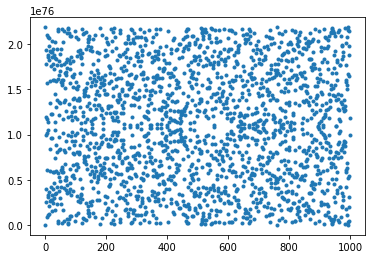

In [32]:
xs = []
ys = []
for i in range(1,1000):
    xs.append(i)
    ys.append(int(multiply(G1, i)[1]))
    xs.append(i)
    ys.append(int(neg(multiply(G1, i))[1]))

plt.scatter(xs, ys, marker='.')

In [33]:
# 5 = 2 + 3
assert eq(multiply(G1, 5), add(multiply(G1, 2), multiply(G1, 3)));

## Implementation detail about the homomorphism between modular addition and elliptic curve addition

- The field modulus is the modulo we do the curve over.
- The curve order is the number of points on the curve.

In [34]:
# If you start with a point r and add the curve order o, you will get r back.

x = 5

print("Curve Order : ", curve_order)
print("Field Modulus : ", field_modulus)

assert eq(multiply(G1, x), multiply(G1, x + curve_order))

assert not eq(multiply(G1, x), multiply(G1, x + field_modulus))

Curve Order :  21888242871839275222246405745257275088548364400416034343698204186575808495617
Field Modulus :  21888242871839275222246405745257275088696311157297823662689037894645226208583


In [35]:
# The implication of this is that (x + y) mod curve_order == xG + yG.

x = 2 ** 300 + 21
y = 3 ** 50 + 11

# (x + y) == xG + yG
assert eq(multiply(G1, (x + y)), add(multiply(G1, x), multiply(G1, y)))
assert eq(multiply(G1, (x + y) % curve_order), add(multiply(G1, x), multiply(G1, y)))
# this will break :
assert not eq(multiply(G1, (x + y) % (curve_order - 1)), add(multiply(G1, x), multiply(G1, y))), "this will fail"

print(">>>>", multiply(G1, (x + y) % curve_order))
print(">>>>", multiply(G1, (x + y) % (curve_order - 1)))

# as we can see both the results are different and only the property of curve_order exists. Not for any other random large number


>>>> (19596069575947521697579586684737354563186121215002080654446739139746941959877, 18791261554114331957227303176985206680705378591731357658619795382698634326776)
>>>> (13832983282578739737464409060892170036449358139716652194173398536022654425415, 5591354120541476417235370092255322780425880907023006669295940281901639173138)


### Encoding rational numbers

In [36]:
# this throws an exception
# assert not eq(add(multiply(G1, 5/2), multiply(G1, 1/2), multiply(G1, 3)))

# but if we compute this using finite field arithmetic : 
# - 5/2 == 5 * inverse(2) in finite arithmetic

# Implementation :

five_over_two = (5 * pow(2, -1, curve_order)) % curve_order # 5/2
one_half = pow(2, -1, curve_order) # 1/2

# Essentially 5/2 = 2.5# 2.5 + 0.5 = 3
# but we are doing this in a finite field
assert eq(add(multiply(G1, five_over_two), multiply(G1, one_half)), multiply(G1, 3))

### Associativity :

For eg :

(a + b) + c = a + (b + c)

In [37]:
x = 5
y = 10
z = 15

lhs = add(add(multiply(G1, x), multiply(G1, y)), multiply(G1, z))
rhs = add(multiply(G1, x), add(multiply(G1, y), multiply(G1, z)))
assert eq(lhs, rhs)

### Every element is having an inverse

In [38]:
# pick a field element
x = 12345678
# generate the point
p = multiply(G1, x)
# invert
p_inv = neg(p)

# every element added to its inverse produces the identity elementassert is_inf(add(p, p_inv))
# Z1 is just None, which is the point at infinity, Z1 is the identity element of a curve
assert Z1 is None
# special case: the inverse of the identity is itself
assert eq(neg(Z1), Z1)

In [39]:
# As is the case with elliptic curves over real numbers, the inverse of an elliptic curve point has the same x value, but the y value is the inverse.

for i in range(1, 4):
    point = multiply(G1, i)
    print(point)
    print(neg(point))
    print('----')
    # x values are the same
    assert int(point[0]) == int(neg(point)[0])
    # y values are inverses of each other, we are adding y values
    # not ec points
    assert int(point[1]) + int(neg(point)[1]) == field_modulus

(1, 2)
(1, 21888242871839275222246405745257275088696311157297823662689037894645226208581)
----
(1368015179489954701390400359078579693043519447331113978918064868415326638035, 9918110051302171585080402603319702774565515993150576347155970296011118125764)
(1368015179489954701390400359078579693043519447331113978918064868415326638035, 11970132820537103637166003141937572314130795164147247315533067598634108082819)
----
(3353031288059533942658390886683067124040920775575537747144343083137631628272, 19321533766552368860946552437480515441416830039777911637913418824951667761761)
(3353031288059533942658390886683067124040920775575537747144343083137631628272, 2566709105286906361299853307776759647279481117519912024775619069693558446822)
----
